# Problem Statement:
   
Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model with implementation of  different classifiers on liver patient diseases dataset to predict liver diseases.

Task3:- Create an analysis to show on what basis you have designed your model.  

# Dataset Link:  

##Context:

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, 
inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

Content:
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Target" column is a class label used to divide groups into liver patients (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.
Any patient whose age exceeded 89 is listed as being of age "90".


Link : https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1007-LiverPatientPred.zip

## Project Summary: Predictive Modeling for Liver Disease Detection

In response to the escalating prevalence of liver disease attributed to various factors such as alcohol consumption, exposure to harmful gases, contaminated food, pickles, and drugs, a dataset has been compiled to facilitate the development of prediction algorithms. The primary objective of this project is to alleviate the burden on healthcare professionals by employing machine learning techniques to accurately identify individuals with liver disease.

The dataset comprises a total of 583 patient records, with 416 instances corresponding to patients with liver disease and 167 instances denoting individuals without liver disease. The data was meticulously collected from the North East region of Andhra Pradesh, India. Gender distribution in the dataset includes 441 male patient records and 142 female patient records. Notably, any patient aged 90 or above is categorized as being of age "90" in the dataset.

The key feature for classification is the "Target" column, serving as a class label to categorize patients into two groups: those with liver disease and those without. Leveraging this dataset, the project aims to develop robust prediction algorithms that can enhance early detection of liver disease, ultimately contributing to more efficient and timely medical interventions. This initiative holds significant promise in optimizing healthcare resources and improving patient outcomes in the context of liver-related health issues.




# Downloading and Extracting Zip file from the Dataset Link

In [1]:
import requests
import zipfile
import io
import os

In [2]:
#Download and extract the zip file
# URL of the ZIP file
zip_url = "https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1007-LiverPatientPred.zip"

In [3]:
# Define the directory where you want to save the extracted files
output_directory = r"C:\Users\Akinmegs\Desktop\CapstoneProjects\LiverPred"  # Modify this to your preferred directory

In [4]:
# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

In [5]:
# Send an HTTP GET request to download the ZIP file
response = requests.get(zip_url)

if response.status_code == 200:
    # Read the content of the ZIP file
    zip_data = io.BytesIO(response.content)

    # Define the path to save the downloaded ZIP file
    zip_file_path = os.path.join(output_directory, "PRCP-1007-LiverPatientPred.zip")

    # Save the downloaded ZIP file
    with open(zip_file_path, "wb") as zip_file:
        zip_file.write(response.content)

    # Extract the contents of the ZIP file to the specified directory
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(output_directory)
    
    print(f"ZIP file has been successfully downloaded and extracted to {output_directory}")
else:
    print("Failed to download the ZIP file. Check the URL or your internet connection.")

ZIP file has been successfully downloaded and extracted to C:\Users\Akinmegs\Desktop\CapstoneProjects\LiverPred


# Accessing and uploading the Extracted Data

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
pwd

'C:\\Users\\Akinmegs\\Desktop\\CapstoneProjects\\LiverPred'

In [8]:
# Define the column names
column_names = ["Age", "Gender", "Total Bilirubin", "Direct Bilirubin", "Alkaline Phosphatase", "Alamine Aminotransferase",
                "Aspartate Aminotransferase", "Total Proteins", "Albumin", "Albumin and Globulin Ratio", "Class"]

# Read the dataset with column names
data = pd.read_csv('C:\\Users\\Akinmegs\\Desktop\\CapstoneProjects\\LiverPred\\Data\\Indian Liver Patient Dataset (ILPD).csv', names=column_names)

In [9]:
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphatase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Proteins,Albumin,Albumin and Globulin Ratio,Class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [10]:
data.shape

(583, 11)

# Domian Information:


1. Age: Age of the individual (in years).
2. Gender: Gender of the individual (Male or Female).
3. Total Bilirubin: A measure of a liver enzyme (in mg/dL).
4. Direct Bilirubin: Another measure of a liver enzyme (in mg/dL).
5. Alkaline Phosphotase: A measure of another liver enzyme (in IU/L).
6. Alamine Aminotransferase (ALT): A measure of liver function (in IU/L).
7. Aspartate Aminotransferase (AST): Another measure of liver function (in IU/L).
8. Total Protiens: The total amount of proteins in the blood (in g/dL).
9. Albumin: A type of protein in the blood (in g/dL).
10. Albumin and Globulin Ratio: A ratio of albumin to globulin in the blood.
11. Class(Target column): A categorical variable indicating whether the individual has a liver disease (1) or not (2).


This dataset is related to liver health of India , with various liver enzyme measurements and other health indicators. 
    


In [11]:
data.dtypes

Age                             int64
Gender                         object
Total Bilirubin               float64
Direct Bilirubin              float64
Alkaline Phosphatase            int64
Alamine Aminotransferase        int64
Aspartate Aminotransferase      int64
Total Proteins                float64
Albumin                       float64
Albumin and Globulin Ratio    float64
Class                           int64
dtype: object

In [12]:
data.isnull().sum()

Age                           0
Gender                        0
Total Bilirubin               0
Direct Bilirubin              0
Alkaline Phosphatase          0
Alamine Aminotransferase      0
Aspartate Aminotransferase    0
Total Proteins                0
Albumin                       0
Albumin and Globulin Ratio    4
Class                         0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total Bilirubin             583 non-null    float64
 3   Direct Bilirubin            583 non-null    float64
 4   Alkaline Phosphatase        583 non-null    int64  
 5   Alamine Aminotransferase    583 non-null    int64  
 6   Aspartate Aminotransferase  583 non-null    int64  
 7   Total Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin and Globulin Ratio  579 non-null    float64
 10  Class                       583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


# Exploratory Data Analysis (EDA):

# Distribution analysis: 
Visualize and analyze the distribution of numerical variables.

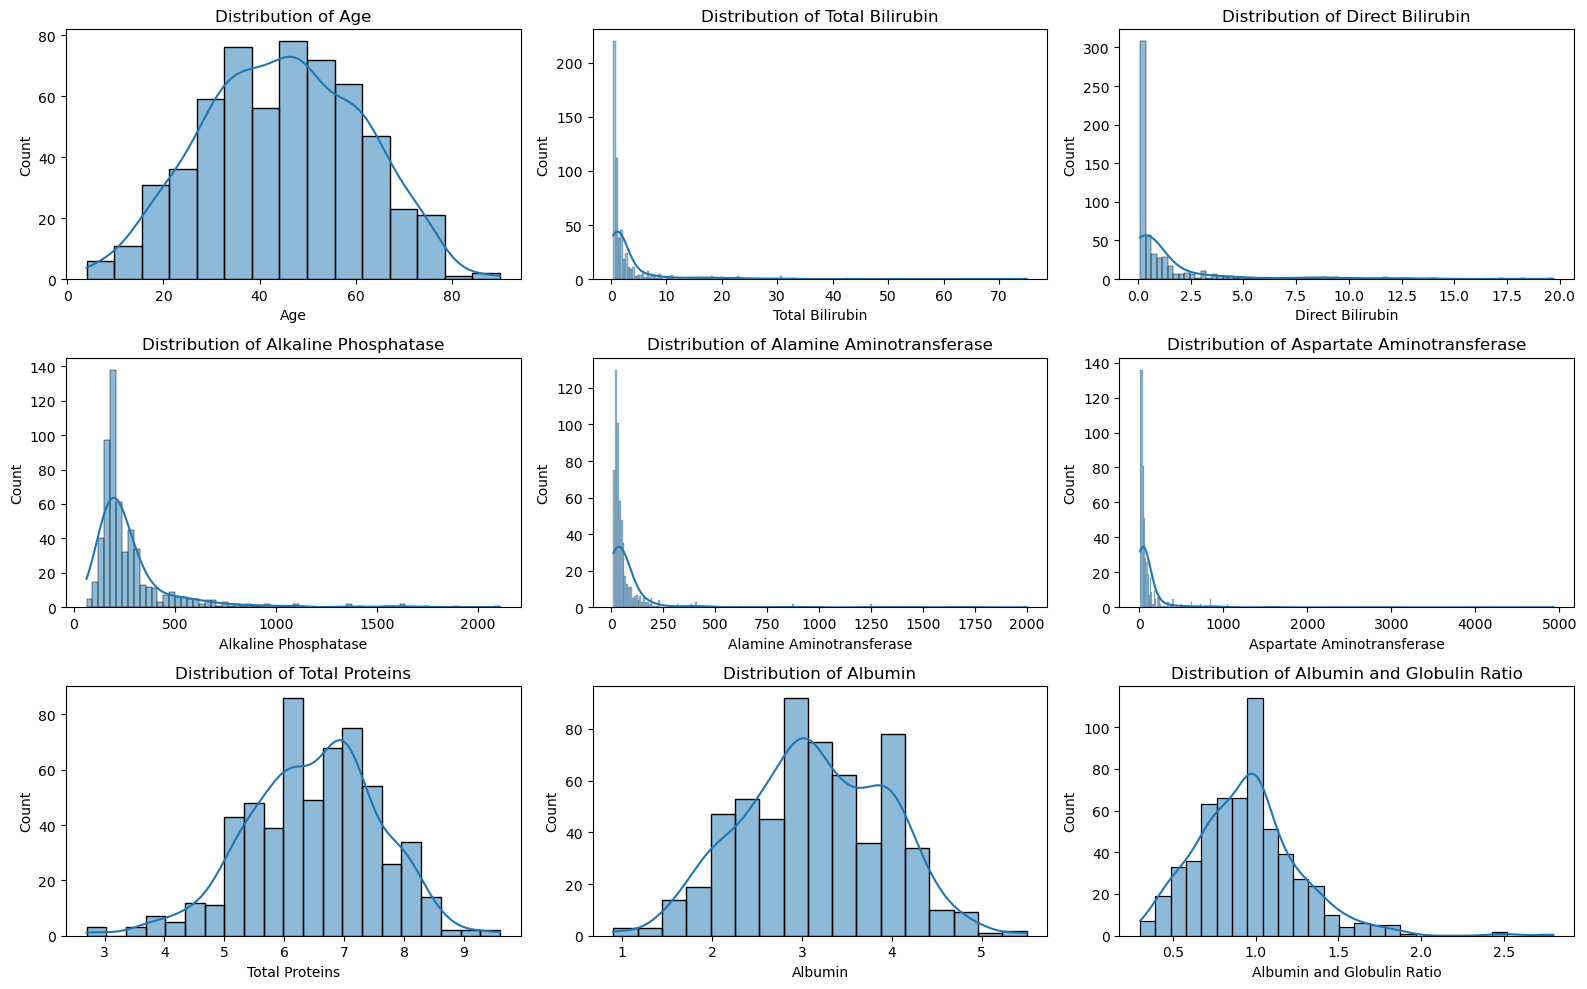

In [43]:
# Select numerical columns for distribution analysis
numerical_columns = ["Age", "Total Bilirubin", "Direct Bilirubin", "Alkaline Phosphatase", 
                     "Alamine Aminotransferase", "Aspartate Aminotransferase", 
                     "Total Proteins", "Albumin", "Albumin and Globulin Ratio"]

# Create subplots for numerical variables
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

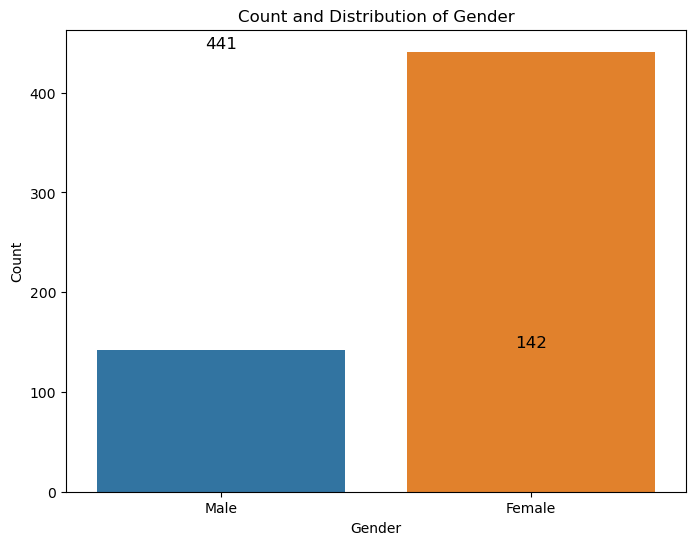

In [14]:
# Count and distribution of gender
gender_counts = data["Gender"].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Gender")
plt.title("Count and Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Male", "Female"])
for i, count in enumerate(gender_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)
plt.show()

In [ ]:
##BIVARIATE ANALYSIS

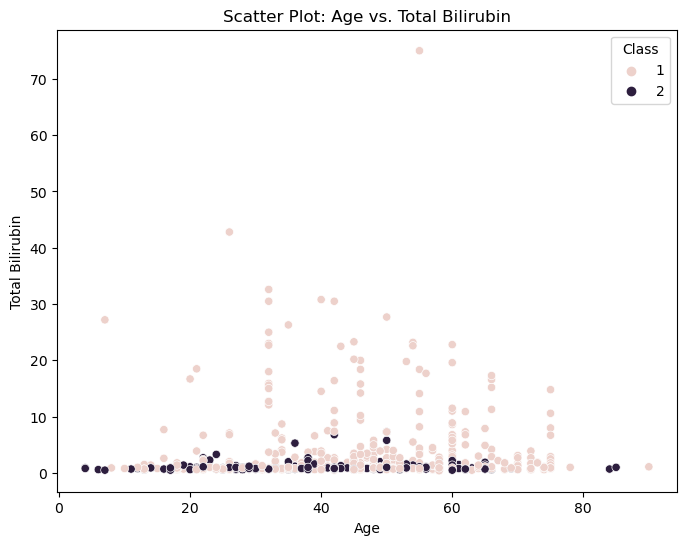

In [90]:
# Age vs. Total Bilirubin
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='Total Bilirubin', hue='Class')
plt.title('Scatter Plot: Age vs. Total Bilirubin')
plt.xlabel('Age')
plt.ylabel('Total Bilirubin')
plt.show()

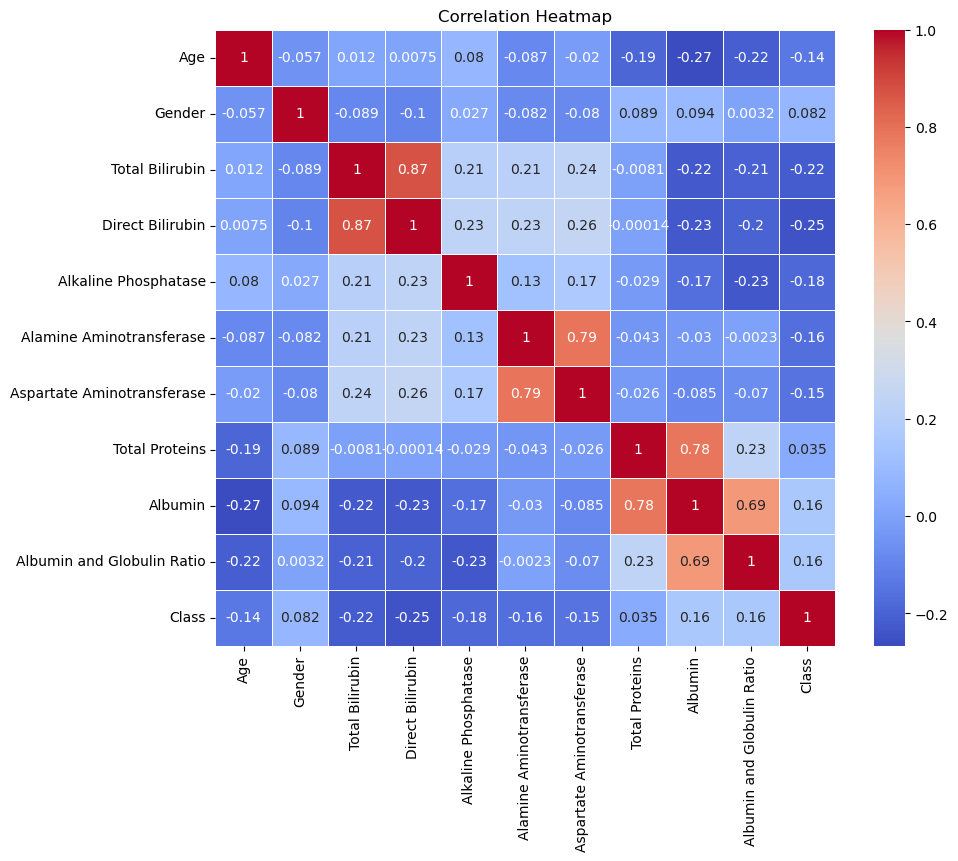

In [91]:
# Example: Correlation matrix heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [92]:
#Categorical vs. Categorical Variables:
#Cross-tabulation between 'Gender' and 'Class'
cross_tab = pd.crosstab(data['Gender'], data['Class'])
print(cross_tab)

# Chi-square test for independence
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(cross_tab)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Class     1    2
Gender          
0       324  117
1        92   50
Chi-square statistic: 3.546648610670605
P-value: 0.059665846857774464


The contingency table above shows the distribution of individuals across two classes (1 and 2) based on their gender (0 for females and 1 for males). The Chi-square statistic and p-value are statistical measures used to assess the independence or association between two categorical variables, in this case, gender and class.

Here are some of the inferences from the provided information:

Contingency Table: The table presents the counts of individuals in each category. For example, there are 324 females (Gender 0) in Class 1 and 117 females in Class 2. Similarly, there are 92 males (Gender 1) in Class 1 and 50 males in Class 2.

Chi-square Statistic: The Chi-square statistic is a measure of how much the observed values in the table differ from the values we would expect if there were no association between gender and class. In this case, the Chi-square statistic is approximately 3.55.

P-value: The p-value is a crucial measure in hypothesis testing. It tells you the probability of obtaining results as extreme as the observed results if there were no real association between gender and class (i.e., if the variables were independent). In this case, the p-value is approximately 0.0597.

Now, interpreting the results:

If the p-value is less than a chosen significance level (commonly 0.05), it suggests that there is evidence to reject the null hypothesis. The null hypothesis typically assumes that there is no association between the variables.

If the p-value is greater than the significance level, it suggests that there is not enough evidence to reject the null hypothesis, meaning that we cannot conclude that there is a significant association between gender and class.

In this case:

The p-value is approximately 0.0597, which is slightly greater than the typical significance level of 0.05.

Based on the p-value:
With a significance level of 0.05, we would fail to reject the null hypothesis, suggesting that there isn't strong enough evidence to conclude that there is a significant association between gender and class.

In summary, the Chi-square test indicates a potential association between gender and class, but the evidence is not strong enough to make a definitive conclusion at the standard significance level of 0.05. Further investigation or a larger sample size might be needed to clarify the relationship between these variables.

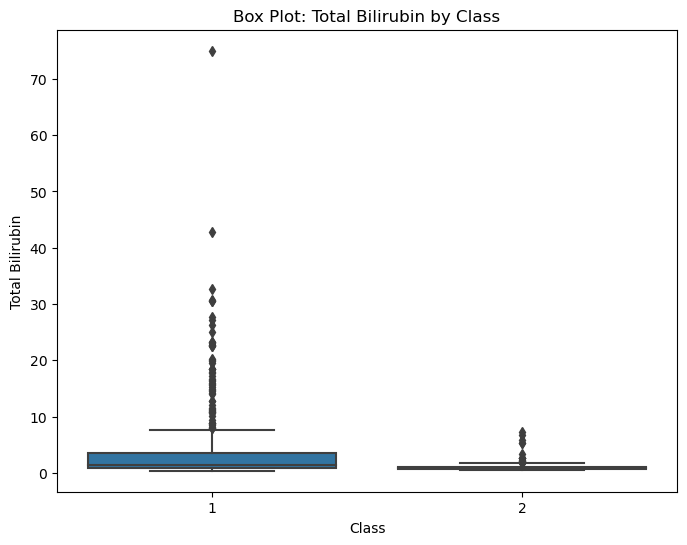

In [93]:
##Numerical vs. Categorical Variables:
#Box plot for 'Total Bilirubin' by 'Class'
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Class', y='Total Bilirubin')
plt.title('Box Plot: Total Bilirubin by Class')
plt.xlabel('Class')
plt.ylabel('Total Bilirubin')
plt.show()

In [94]:
# Example: T-test for 'Total Bilirubin' by 'Class'
from scipy.stats import ttest_ind

class_1 = data[data['Class'] == 1]['Total Bilirubin']
class_2 = data[data['Class'] == 2]['Total Bilirubin']

t_statistic, p_value = ttest_ind(class_1, class_2)
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 5.441441126834863
P-value: 7.801430929364345e-08


Here's what these results mean:

T-statistic: The t-statistic measures the difference in means between the two groups (Class 1 and Class 2) with respect to the "Total Bilirubin" variable. In this case, the t-statistic is approximately 5.44.

P-value: The p-value associated with the t-test measures the probability of observing such a difference in means (or more extreme) by random chance, assuming that there is no real difference between the groups. A very small p-value (e.g., 7.801430929364345e-08, which is close to 0) indicates that the observed difference in means is statistically significant.

In practical terms, the small p-value suggests that there is strong evidence to reject the null hypothesis, which is typically that there is no difference in "Total Bilirubin" levels between Class 1 and Class 2. Instead, the results suggest that there is a statistically significant difference in "Total Bilirubin" levels between these two classes. The t-statistic indicates the magnitude of this difference.

In summary, the t-test results suggest that "Total Bilirubin" levels are significantly different between the two classes (Class 1 and Class 2), with Class 1 having higher or lower levels than Class 2, depending on the sign of the t-statistic.

# Descriptive Statistics

In [45]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline Phosphatase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total Proteins,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin and Globulin Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Class,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


Age:
Count: 583
Mean age: Approximately 44.75 years
Standard deviation: Approximately 16.19 years
Minimum age: 4 years
25th percentile (Q1): 33 years
Median (Q2 or 50th percentile): 45 years
75th percentile (Q3): 58 years
Maximum age: 90 years

Total Bilirubin:
Count: 583
Mean total bilirubin level: Approximately 3.30 mg/dL
Standard deviation: Approximately 6.21 mg/dL
Minimum level: 0.4 mg/dL
25th percentile: 0.8 mg/dL
Median: 1.0 mg/dL
75th percentile: 2.6 mg/dL
Maximum level: 75.0 mg/dL

Direct Bilirubin:
Count: 583
Mean direct bilirubin level: Approximately 1.49 mg/dL
Standard deviation: Approximately 2.81 mg/dL
Minimum level: 0.1 mg/dL
25th percentile: 0.2 mg/dL
Median: 0.3 mg/dL
75th percentile: 1.3 mg/dL
Maximum level: 19.7 mg/dL

Alkaline Phosphatase:
Count: 583
Mean alkaline phosphatase level: Approximately 290.58 IU/L
Standard deviation: Approximately 242.94 IU/L
Minimum level: 63 IU/L
25th percentile: 175.5 IU/L
Median: 208.0 IU/L
75th percentile: 298.0 IU/L
Maximum level: 2110.0 IU/L

Alamine Aminotransferase (ALT):
Count: 583
Mean ALT level: Approximately 80.71 IU/L
Standard deviation: Approximately 182.62 IU/L
Minimum level: 10.0 IU/L
25th percentile: 23.0 IU/L
Median: 35.0 IU/L
75th percentile: 60.5 IU/L
Maximum level: 2000.0 IU/L

Aspartate Aminotransferase (AST):
Count: 583
Mean AST level: Approximately 109.91 IU/L
Standard deviation: Approximately 288.92 IU/L
Minimum level: 10.0 IU/L
25th percentile: 25.0 IU/L
Median: 42.0 IU/L
75th percentile: 87.0 IU/L
Maximum level: 4929.0 IU/L

Total Proteins:
Count: 583
Mean total protein level: Approximately 6.48 g/dL
Standard deviation: Approximately 1.09 g/dL
Minimum level: 2.7 g/dL
25th percentile: 5.8 g/dL
Median: 6.6 g/dL
75th percentile: 7.2 g/dL
Maximum level: 9.6 g/dL

Albumin:
Count: 583
Mean albumin level: Approximately 3.14 g/dL
Standard deviation: Approximately 0.80 g/dL
Minimum level: 0.9 g/dL
25th percentile: 2.6 g/dL
Median: 3.1 g/dL
75th percentile: 3.8 g/dL
Maximum level: 5.5 g/dL

Albumin and Globulin Ratio:
Count: 579 (Note: There are some missing values in this column)
Mean albumin and globulin ratio: Approximately 0.95
Standard deviation: Approximately 0.32
Minimum ratio: 0.3
25th percentile: 0.7
Median: 0.93
75th percentile: 1.1
Maximum ratio: 2.8

Class:
Count: 583
The target variable indicating the presence (1) or absence (2) of liver disease.
Mean value: Approximately 1.29
Standard deviation: Approximately 0.45
Minimum value: 1
25th percentile: 1
Median: 1
75th percentile: 2
Maximum value: 2

These statistics provide a comprehensive overview of the dataset's numerical variables and their distributions. These insights can be use to inform further analysis and modeling, such as identifying potential outliers, understanding variable relationships, and building predictive models for liver disease.

# Data Preprocessing:

In [79]:
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphatase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Proteins,Albumin,Albumin and Globulin Ratio,Class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [80]:
##Handling Outliers
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
data['Albumin and Globulin Ratio'] = imputer.fit_transform(data[['Albumin and Globulin Ratio']])

In [81]:
data.isnull().sum()

Age                           0
Gender                        0
Total Bilirubin               0
Direct Bilirubin              0
Alkaline Phosphatase          0
Alamine Aminotransferase      0
Aspartate Aminotransferase    0
Total Proteins                0
Albumin                       0
Albumin and Globulin Ratio    0
Class                         0
dtype: int64

# DATA ENCODING

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [83]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [84]:
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphatase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Proteins,Albumin,Albumin and Globulin Ratio,Class
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [85]:
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphatase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Proteins,Albumin,Albumin and Globulin Ratio,Class
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1



•	Correlation analysis: 
Examine correlations between different numerical variables and the target variable ("Class").

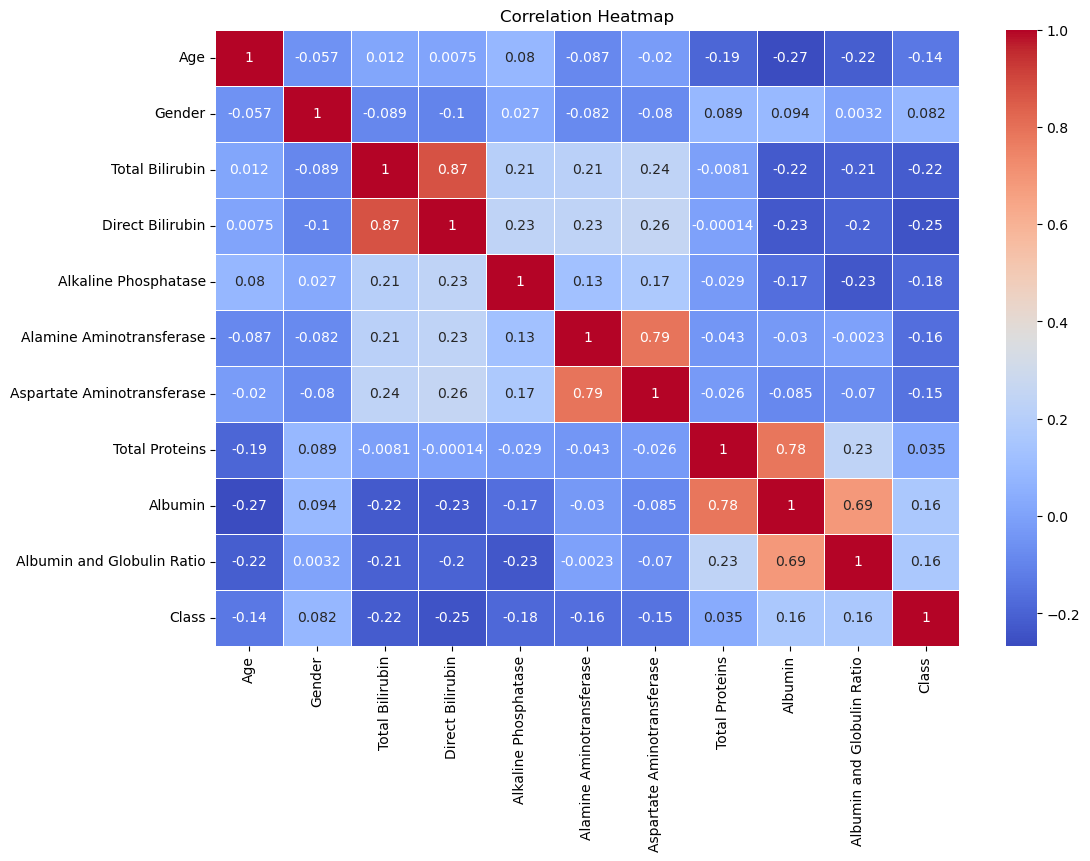

Correlation with target variable (Class):
Class                         1.000000
Albumin and Globulin Ratio    0.162144
Albumin                       0.161388
Gender                        0.082416
Total Proteins                0.035008
Age                          -0.137351
Aspartate Aminotransferase   -0.151934
Alamine Aminotransferase     -0.163416
Alkaline Phosphatase         -0.184866
Total Bilirubin              -0.220208
Direct Bilirubin             -0.246046
Name: Class, dtype: float64


In [86]:
# Compute the correlation matrix for numerical variables
correlation_matrix = data.corr()

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Calculate the correlation of numerical variables with the target variable ("Class")
correlation_with_target = data.corr()['Class'].sort_values(ascending=False)

# Print the correlation values
print("Correlation with target variable (Class):")
print(correlation_with_target)

The correlation values between numerical variables and the target variable ("Class") have been computed, and here are the results:

Class: This is the target variable, and its correlation with itself is 1.0 (perfect positive correlation), which is expected.

Albumin and Globulin Ratio: There is a positive correlation of approximately 0.162 with the target variable ("Class"). This suggests a weak positive relationship.

Albumin: Similar to the albumin and globulin ratio, there is a positive correlation of approximately 0.161 with the target variable ("Class").

Gender: The gender variable has a positive correlation of approximately 0.082 with the target variable ("Class"). However, this correlation is relatively weak.

Total Proteins: The total proteins variable has a positive correlation of approximately 0.035 with the target variable ("Class"), indicating a weak positive relationship.

Age: There is a negative correlation of approximately -0.137 with the target variable ("Class"), suggesting a weak negative relationship.

Aspartate Aminotransferase: This variable has a negative correlation of approximately -0.152 with the target variable ("Class"), indicating a weak negative relationship.

Alamine Aminotransferase: Similarly, there is a negative correlation of approximately -0.163 with the target variable ("Class").

Alkaline Phosphatase: This variable has a negative correlation of approximately -0.185 with the target variable ("Class"), suggesting a weak negative relationship.

Total Bilirubin: The total bilirubin variable has a negative correlation of approximately -0.220 with the target variable ("Class"), indicating a moderate negative relationship.

Direct Bilirubin: This variable has the strongest negative correlation of approximately -0.246 with the target variable ("Class"), indicating a moderate negative relationship.

These correlation values provide insights into how each numerical variable is related to the presence or absence of liver disease ("Class"). Variables with stronger correlations (either positive or negative) may be more influential in predicting the target variable and could be important features in predictive models. However, the correlation values also suggest that the relationships between these variables and liver disease are not very strong, and other factors may also play a role in the prediction. Further analysis and modeling may be necessary to explore these relationships in more detail.

# Feature Engineering:

In [96]:
#Age Groups:
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

In [97]:
##Total Protein-to-Albumin Ratio:
data['Total Protein/Albumin Ratio'] = (data['Total Proteins'] / data['Albumin']).round(2)

In [100]:
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphatase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Proteins,Albumin,Albumin and Globulin Ratio,Class,Age Group,Total Protein/Albumin Ratio
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1,61+,2.06
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1,61+,2.34
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1,61+,2.12
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1,51-60,2.00
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1,61+,3.04


In [101]:
# Apply a log transformation to the 'Total Bilirubin' variable
data['Log_Total_Bilirubin'] = np.log(data['Total Bilirubin'] + 1)  # Adding 1 to avoid log(0)

# Apply a log transformation to the 'Direct Bilirubin' variable
data['Log_Direct_Bilirubin'] = np.log(data['Direct Bilirubin'] + 1)  # Adding 1 to avoid log(0)

# Apply a log transformation to the 'Alkaline Phosphatase' variable
data['Log_Alkaline_Phosphatase'] = np.log(data['Alkaline Phosphatase'] + 1)  # Adding 1 to avoid log(0)

# Apply a log transformation to the 'Alamine Aminotransferase' variable
data['Log_Alamine_Aminotransferase'] = np.log(data['Alamine Aminotransferase'] + 1)  # Adding 1 to avoid log(0)

# Apply a log transformation to the 'Aspartate Aminotransferase' variable
data['Log_Aspartate_Aminotransferase'] = np.log(data['Aspartate Aminotransferase'] + 1)  # Adding 1 to avoid log(0)

In [103]:
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphatase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Proteins,Albumin,Albumin and Globulin Ratio,Class,Age Group,Total Protein/Albumin Ratio,Log_Total_Bilirubin,Log_Direct_Bilirubin,Log_Alkaline_Phosphatase,Log_Alamine_Aminotransferase,Log_Aspartate_Aminotransferase
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1,61+,2.06,0.530628,0.095310,5.236442,2.833213,2.944439
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1,61+,2.34,2.476538,1.871802,6.551080,4.174387,4.615121
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1,61+,2.12,2.116256,1.629241,6.196444,4.110874,4.234107
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1,51-60,2.00,0.693147,0.336472,5.209486,2.708050,3.044522
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1,61+,3.04,1.589235,1.098612,5.278115,3.332205,4.094345


# Class Imbalance Handling:
#Check for class imbalance in the target variable and consider techniques like oversampling, undersampling, or using balanced algorithms


In [104]:
# Check for imbalance
class_distribution = data['Class'].value_counts()

# Print the class distribution
print("Class Distribution:")
print(class_distribution)

Class Distribution:
1    416
2    167
Name: Class, dtype: int64


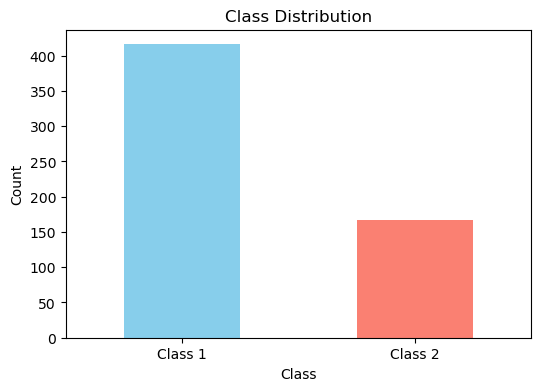

In [107]:
# Create a bar chart
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Class 1', 'Class 2'], rotation=0)
plt.show()

In [113]:
from sklearn.preprocessing import OneHotEncoder


age_group_column = data[['Age Group']]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the 'Age Group' column
age_group_encoded = encoder.fit_transform(age_group_column)

In [114]:
# Get the feature names for one-hot encoded columns
encoded_feature_names = encoder.get_feature_names_out(['Age Group'])


In [115]:
# Create a new DataFrame with the one-hot encoded 'Age Group' columns and appropriate column names
age_group_encoded_df = pd.DataFrame(age_group_encoded, columns=encoded_feature_names)

In [116]:
# Concatenate the one-hot encoded 'Age Group' DataFrame with the original data
data_encoded = pd.concat([data, age_group_encoded_df], axis=1)

In [117]:
# Drop the original 'Age Group' column as it's no longer needed
data_encoded.drop('Age Group', axis=1, inplace=True)

In [118]:
# Separate features and target variable
X = data_encoded.drop('Class', axis=1)
y = data_encoded['Class']

In [119]:
# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [120]:
# Check the new class distribution
new_class_distribution = pd.Series(y_resampled).value_counts()
print("Class Distribution after SMOTE:")
print(new_class_distribution)

Class Distribution after SMOTE:
1    416
2    416
Name: Class, dtype: int64


# Predictive Modeling:


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [122]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [123]:
# Standardize features (only if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
# Define and train classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    # Display results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{confusion}")
    print(f"Classification Report:\n{classification_rep}")
    print("=" * 40)

Model: Logistic Regression
Accuracy: 0.8143712574850299
Confusion Matrix:
[[54 21]
 [10 82]]
Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.72      0.78        75
           2       0.80      0.89      0.84        92

    accuracy                           0.81       167
   macro avg       0.82      0.81      0.81       167
weighted avg       0.82      0.81      0.81       167

Model: Decision Tree
Accuracy: 0.7125748502994012
Confusion Matrix:
[[54 21]
 [27 65]]
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.72      0.69        75
           2       0.76      0.71      0.73        92

    accuracy                           0.71       167
   macro avg       0.71      0.71      0.71       167
weighted avg       0.72      0.71      0.71       167

Model: Random Forest
Accuracy: 0.8323353293413174
Confusion Matrix:
[[60 15]
 [13 79]]
Classification Report:
          

# Model Insights:

Logistic Regression:
Accuracy: 81.44%
Precision for Class 1 (no liver disease): 84%
Precision for Class 2 (liver disease): 80%
Recall for Class 1: 72%
Recall for Class 2: 89%
F1-score for Class 1: 78%
F1-score for Class 2: 84%

This model performs well with a balanced trade-off between precision and recall for both classes.

Decision Tree:
Accuracy: 71.26%
Precision for Class 1: 67%
Precision for Class 2: 76%
Recall for Class 1: 72%
Recall for Class 2: 71%
F1-score for Class 1: 69%
F1-score for Class 2: 73%

The Decision Tree model shows balanced but slightly lower performance compared to Logistic Regression.

Random Forest (Best Model):
Accuracy: 83.23% (highest)
Precision for Class 1: 82%
Precision for Class 2: 84%
Recall for Class 1: 80%
Recall for Class 2: 86%
F1-score for Class 1: 81%
F1-score for Class 2: 85%

The Random Forest model outperforms others with the highest accuracy and balanced precision and recall for both classes.

Support Vector Machine (SVM):
Accuracy: 76.65%
Precision for Class 1: 82%
Precision for Class 2: 74%
Recall for Class 1: 61%
Recall for Class 2: 89%
F1-score for Class 1: 70%
F1-score for Class 2: 81%

SVM has competitive performance but slightly lower recall for Class 1.

Best Model:
Based on the provided metrics (accuracy, precision, recall, and F1-score), the Random Forest model is the best-performing model among the ones tested.

It achieves the highest accuracy (83.23%) and balanced precision and recall for both classes, making it a robust choice for predicting liver disease in this dataset.

Final Recommendation:
The Random Forest model should be selected as the best model for predicting liver disease in this dataset. However, it's essential to consider other factors like interpretability, computational resources, and the specific goals of your analysis when making a final decision. Additionally, we can further fine-tune the Random Forest hyperparameters and evaluate it using cross-validation to ensure its robustness

# Hyperparameter tuning: 
    Optimize model hyperparameters to improve predictive performance.

In [125]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [126]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [127]:
# Create a Grid Search object with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [128]:
# Perform the Grid Search on the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [129]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [130]:
# Get the best model
best_rf_model = grid_search.best_estimator_

In [131]:
# Evaluate the best model on the test set
y_pred_best = best_rf_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("Best Hyperparameters:", best_params)
print("Accuracy with Best Model:", accuracy_best)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy with Best Model: 0.8143712574850299


In [ ]:
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy with Best Model: 0.8143712574850299

# Interpretability:
Use techniques like SHAP (SHapley Additive exPlanations) to interpret and explain model predictions.

In [133]:
!pip install shap

                                              0.0/462.3 kB ? eta -:--:--
     --                                    30.7/462.3 kB 660.6 kB/s eta 0:00:01
     ---                                   41.0/462.3 kB 393.8 kB/s eta 0:00:02
     ----                                  61.4/462.3 kB 469.7 kB/s eta 0:00:01
     --------                             112.6/462.3 kB 547.6 kB/s eta 0:00:01
     ---------                            122.9/462.3 kB 450.6 kB/s eta 0:00:01
     -------------                        174.1/462.3 kB 583.1 kB/s eta 0:00:01
     ------------------                   235.5/462.3 kB 722.1 kB/s eta 0:00:01
     ---------------------                276.5/462.3 kB 710.0 kB/s eta 0:00:01
     ----------------------------         368.6/462.3 kB 851.3 kB/s eta 0:00:01
     -------------------------------      399.4/462.3 kB 831.5 kB/s eta 0:00:01
     -----------------------------------  460.8/462.3 kB 874.9 kB/s eta 0:00:01
     ------------------------------------ 462.3

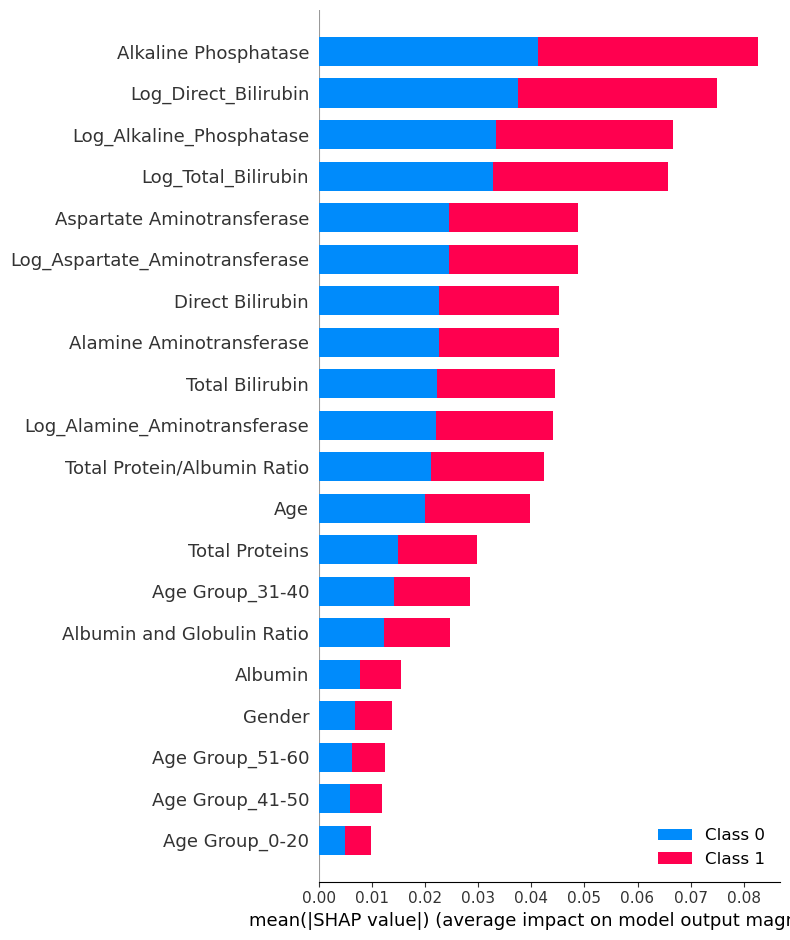

In [136]:
import shap

# Initialize the SHAP explainer with the best Random Forest model
explainer = shap.Explainer(best_rf_model)

# Calculate SHAP values for the entire test dataset
shap_values = explainer.shap_values(X_test)

# Summary plot to visualize feature importances for all samples
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Health Insights:
•	Calculate risk scores: Develop a scoring system to assess an individual's risk of liver disease based on the model's predictions.
•	Identify key risk factors: Determine which features have the most significant impact on liver disease prediction.

# Calculate Risk Scores:

#Model Prediction Probability: 
Use the trained Random Forest model to predict the probability of liver disease (Class 2) for each individual in the dataset.

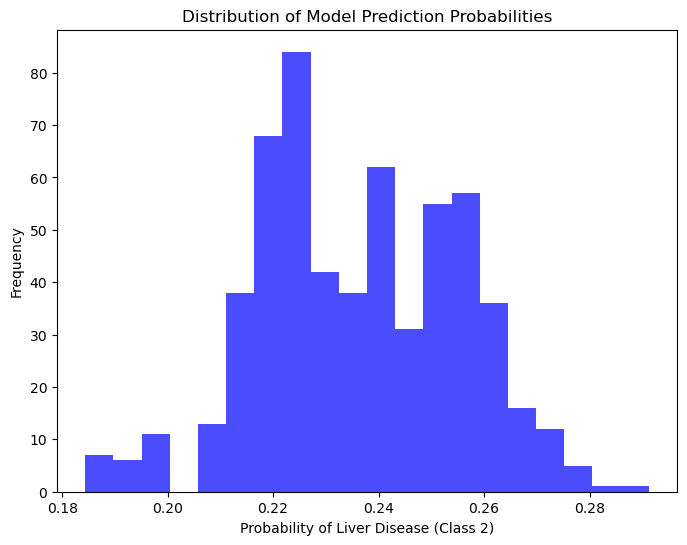

In [139]:
# Use the best Random Forest model to predict probabilities
predicted_probabilities = best_rf_model.predict_proba(X)

# Extract the probability of Class 2 (liver disease)
liver_disease_probabilities = predicted_probabilities[:, 1]

# Plot a histogram of the prediction probabilities
plt.figure(figsize=(8, 6))
plt.hist(liver_disease_probabilities, bins=20, color='blue', alpha=0.7)
plt.xlabel("Probability of Liver Disease (Class 2)")
plt.ylabel("Frequency")
plt.title("Distribution of Model Prediction Probabilities")
plt.show()

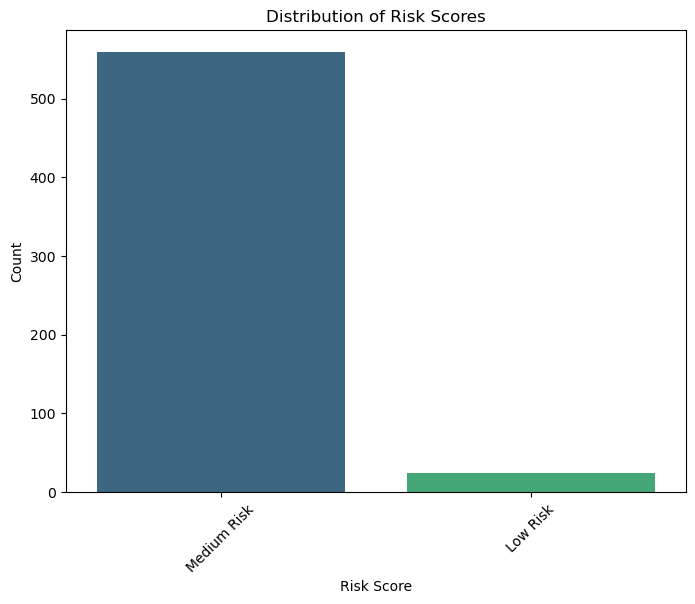

In [142]:
###Risk Score Calculation: 
##Assign risk scores based on the predicted probabilities. 
#This can define risk score categories or bins based on thresholds.

# Define risk score categories and thresholds
low_risk_threshold = 0.2
medium_risk_threshold = 0.5
high_risk_threshold = 0.8

# Initialize an empty list to store risk scores
risk_scores = []

# Calculate risk scores based on probability thresholds
for probability in liver_disease_probabilities:
    if probability < low_risk_threshold:
        risk_scores.append("Low Risk")
    elif probability < medium_risk_threshold:
        risk_scores.append("Medium Risk")
    elif probability < high_risk_threshold:
        risk_scores.append("High Risk")
    else:
        risk_scores.append("Very High Risk")
        
# Create a DataFrame to store the risk scores
risk_score_df = pd.DataFrame({"Risk Score": risk_scores})

# Concatenate the risk score DataFrame with your original data
data_with_risk_scores = pd.concat([data, risk_score_df], axis=1)


# Plot a count plot for the risk scores
plt.figure(figsize=(8, 6))
sns.countplot(data=data_with_risk_scores, x='Risk Score', palette='viridis')
plt.xlabel("Risk Score")
plt.ylabel("Count")
plt.title("Distribution of Risk Scores")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Identify Key Risk Factors:
To determine which features have the most significant impact on liver disease prediction, you can analyze feature importances from your Random Forest model. You can visualize these importances using a bar chart:


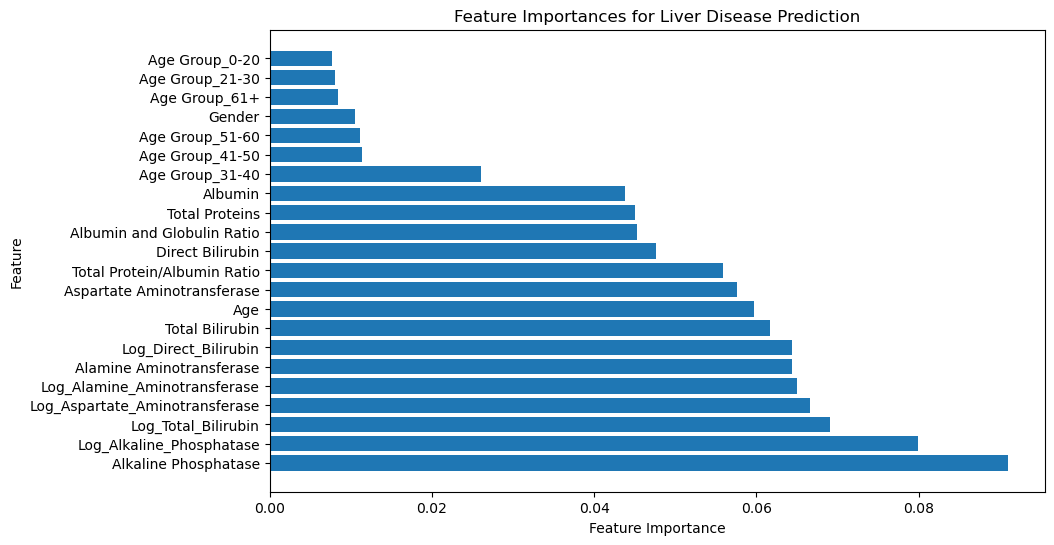

In [143]:
# Get feature importances from the best Random Forest model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances for Liver Disease Prediction")
plt.show()
